In [1]:
##### This code is from Updated Testing Reddit - No Con- bias (Fictitious Play)-01092022
##### This code replace the big real datanetwork with small sythetic network 
import scipy
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
import time
import random
from scipy.stats import beta
import pandas as pd
import copy
%matplotlib inline
#%run pure_strategy_selection.ipynb  #include simple selection algorithm
import scipy.io
import collections
import sys
from itertools import count
from pathlib import Path

## Mathmatic Functions

In [2]:
# centers the opinion vector around 0\n",
def mean_center(op, n):
    ones = np.ones((n, 1))
    x = op - (np.dot(np.transpose(op),ones)/n) * ones
    return x
    
# compute number of edges, m\n
def num_edges(L, n):
    m = 0
    for i in range(n):
        for j in range(n):
            if i > j and L[i,j] < 0:
                m += 1            
    return m

# maximizing polarization only: \\bar{z}^T \\bar{z}   
def obj_polarization(A, L, op, n):
    op_mean = mean_center(op, n)
    z_mean = np.dot(A, op_mean) 
    return np.dot(np.transpose(z_mean), z_mean)[0,0] 


# Calculate innate polarization
def obj_innate_polarization(s, n):  
#     np.set_printoptions(precision=5)
    op_mean = mean_center(s, n)
    return np.dot(np.transpose(op_mean), op_mean)[0,0]

def make_random_network(n, p1):
    np.set_printoptions(precision=4)
    ##create two set of weights connected with density 1) inviduals  2) individual & informaton Source
    c1 = np.sort(np.random.choice(n, n, replace=False)) #assume (1-r) are individuals
    l1 = len(c1)

    ### Prepare for create adjacent matrix
    pre_weights1 = scipy.sparse.random(1, int(0.5*n*(n - 1)), density=p1).A[0] 
    weights1 = pre_weights1/25
    G = np.zeros((n, n))

    ## Assign edges between ind to ind 
    idx = 0
    for i in c1:
        for j in c1:
                if i == j:
                    G[i][j] =0
                    continue
                elif i < j:
                    G[i][j] = weights1[idx]
                    idx += 1
                else:
                    G[i][j] = G[j][i]
    return G

##create two set of weights connected with density 1) inviduals  2) individual & informaton Source


def make_innat_opinions(n): # Make opinion for agents only - no info source is involved
    c1 = np.sort(np.random.choice(n, n, replace=False)) #assume (1-r) are individuals
    # Make list of ind innate opinion to define info source opinion
    innat_s = np.random.uniform(low=0.2, high=0.8, size=int(n))   #individual's innate opinion 

    s = np.zeros((n, 1))
    
    idx1 = 0
    for i in range(len(s)):
        s[i] = innat_s[idx1]  #set innate opinion for ind.
        idx1 += 1  
    return s

## Creating Network
### 1. Make Random Network

In [3]:
# Import Twitter data
s_df = pd.read_csv('preprocess-twitter/opinion_twitter.txt', sep = '\t', header = None)
w_df = pd.read_csv('preprocess-twitter/edges_twitter.txt', sep = '\t', header = None)
# number of vertices
n = len(s_df[0].unique())
s_df.columns = ["ID", "Tick", "Opinion"]
# we take the opinion from the last appearance of the vertex ID in the list as its innate opinion
s = s_df.groupby(["ID"]).last()["Opinion"].values.reshape(n, 1)


# create adjacency matrix
G = np.zeros((n, n))
for i in range(1, n + 1):
    idx = np.where(w_df[0].values == i)[0]
    js = w_df[1].values[idx]
    for j in js:
        G[i-1, j-1] = 1
        G[j-1, i-1] = 1
        
    idx = np.where(w_df[1].values == i)[0]
    js = w_df[0].values[idx]
    for j in js:
        G[i-1, j-1] = 1
        G[j-1, i-1] = 1
        
L = scipy.sparse.csgraph.laplacian(G, normed=False)  # Return the Laplacian matrix
A = np.linalg.inv(np.identity(n) + L)  # A = (I + L)^(-1)\n  Stanford paper theory
m = num_edges(L, n)                    # call the function to calculate the number of edges
# what the twitter graph looks like 
# nxG = nx.from_numpy_matrix(G)          
# plt.figure(figsize=(20, 20))
# nx.draw(nxG)
# columnsum_ij = np.sum(A, axis=0)
# # print(columnsum_ij)
# print(n)
        
        

Text(0.5, 1.0, 'Twitter Network Opinion Distribution')

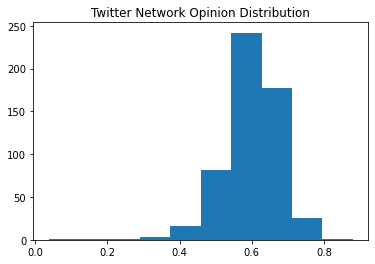

In [4]:
plt.hist(s)
plt.title("Twitter Network Opinion Distribution")

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

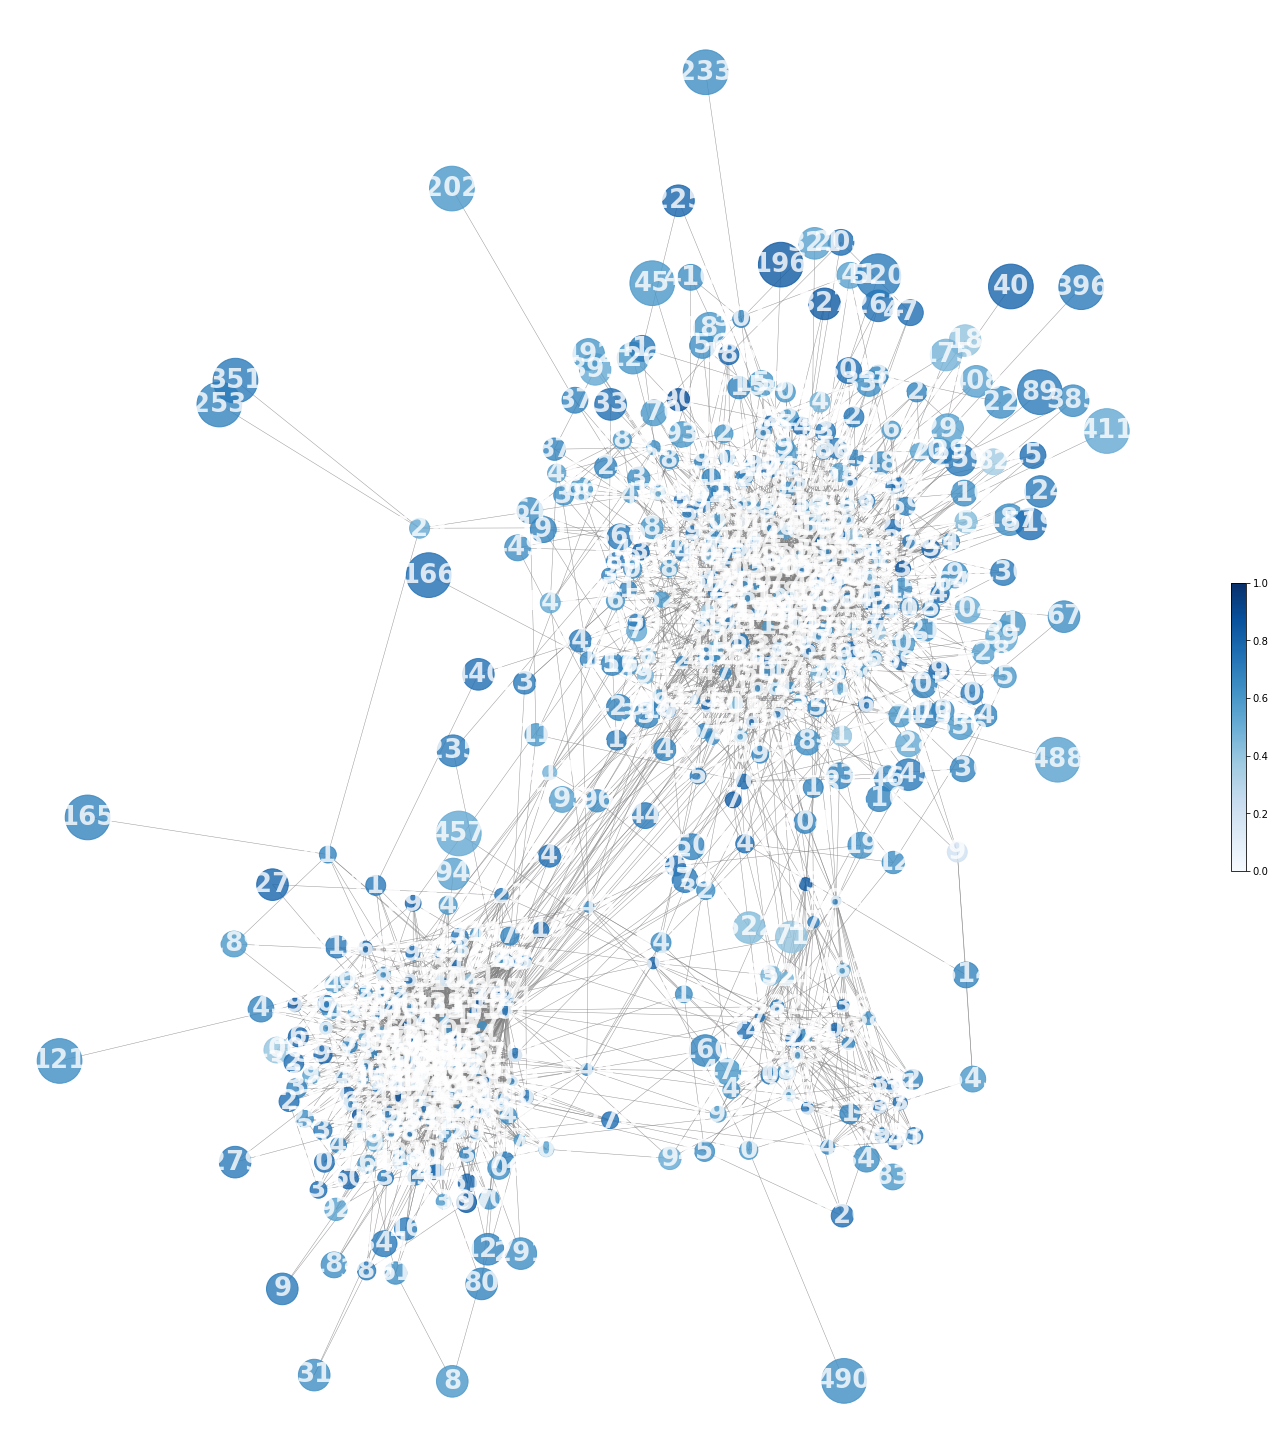

In [5]:
# G = nx.karate_club_graph()
# # print("Node Degree")
# n = 0
# edges = []

# G = make_random_network(n, p1)

# ############################ Make Innate Opinion ################################
# ### Generate innate opinion array
# s_use = make_innat_opinions(n) 
# print(s_use)

### Import fixed opinion
# df = pd.read_csv ('Karate Innate Opinion.csv')
# s_1 = np.array(df[df.columns[1]])
# s = np.reshape(s_1, (n, -1))

s_use = s.flatten()   # Convert array to a list for later operation
s_use = s_use.tolist()
new_s = [i * 30 for i in s_use]
df = pd.DataFrame(new_s, columns=['Opinion']) #create a datafram with index at column 1, opinion at column 2



def node_edge(G, n):
    edges =[]
    for v in range(n):
        a = np.array(np.nonzero(G[v])[0])
        edge = len(a)
#         print(edge)
        edges.append(edge)
        
    return edges

node_edges = node_edge(G, n)
# print(node_edges)

node_sizes =[]
for i in node_edges:
    node_size = 1/i*2000
    node_sizes.append(node_size)
    
# print(node_sizes)

######################### Calculate Key Values & Visualization #######################################3
L = scipy.sparse.csgraph.laplacian(G, normed=False)  # Return the Laplacian matrix
A = np.linalg.inv(np.identity(n) + L)  # A = (I + L)^(-1)\n  Stanford paper theory
m = num_edges(L, n)                    # call the function to calculate the number of edges
columnsum_ij = np.sum(A, axis=0)
print(columnsum_ij)
print(n)
# what the twitter graph looks like 
nxG = nx.from_numpy_matrix(G)          
plt.figure(figsize=(20, 20))

# Fix seed - fix network shape
my_pos = nx.spring_layout(nxG, seed = 25)
nx.draw(nxG, with_labels=True, node_color=df['Opinion'].astype(int),cmap=plt.cm.Blues, node_size= node_sizes, edge_color='grey', width=0.5, font_color='white',font_size=26, font_weight='bold', alpha=0.8)
#nx.draw(nxG, pos = my_pos, with_labels=False, node_color=color_map, node_size= node_sizes, edge_color='grey', width=0.5, font_color='white',font_size=9, font_weight='bold')
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin = 0, vmax=1))
# vmin = min(s)
# vmax = max(s)
#sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm,shrink=0.2)
plt.show()


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

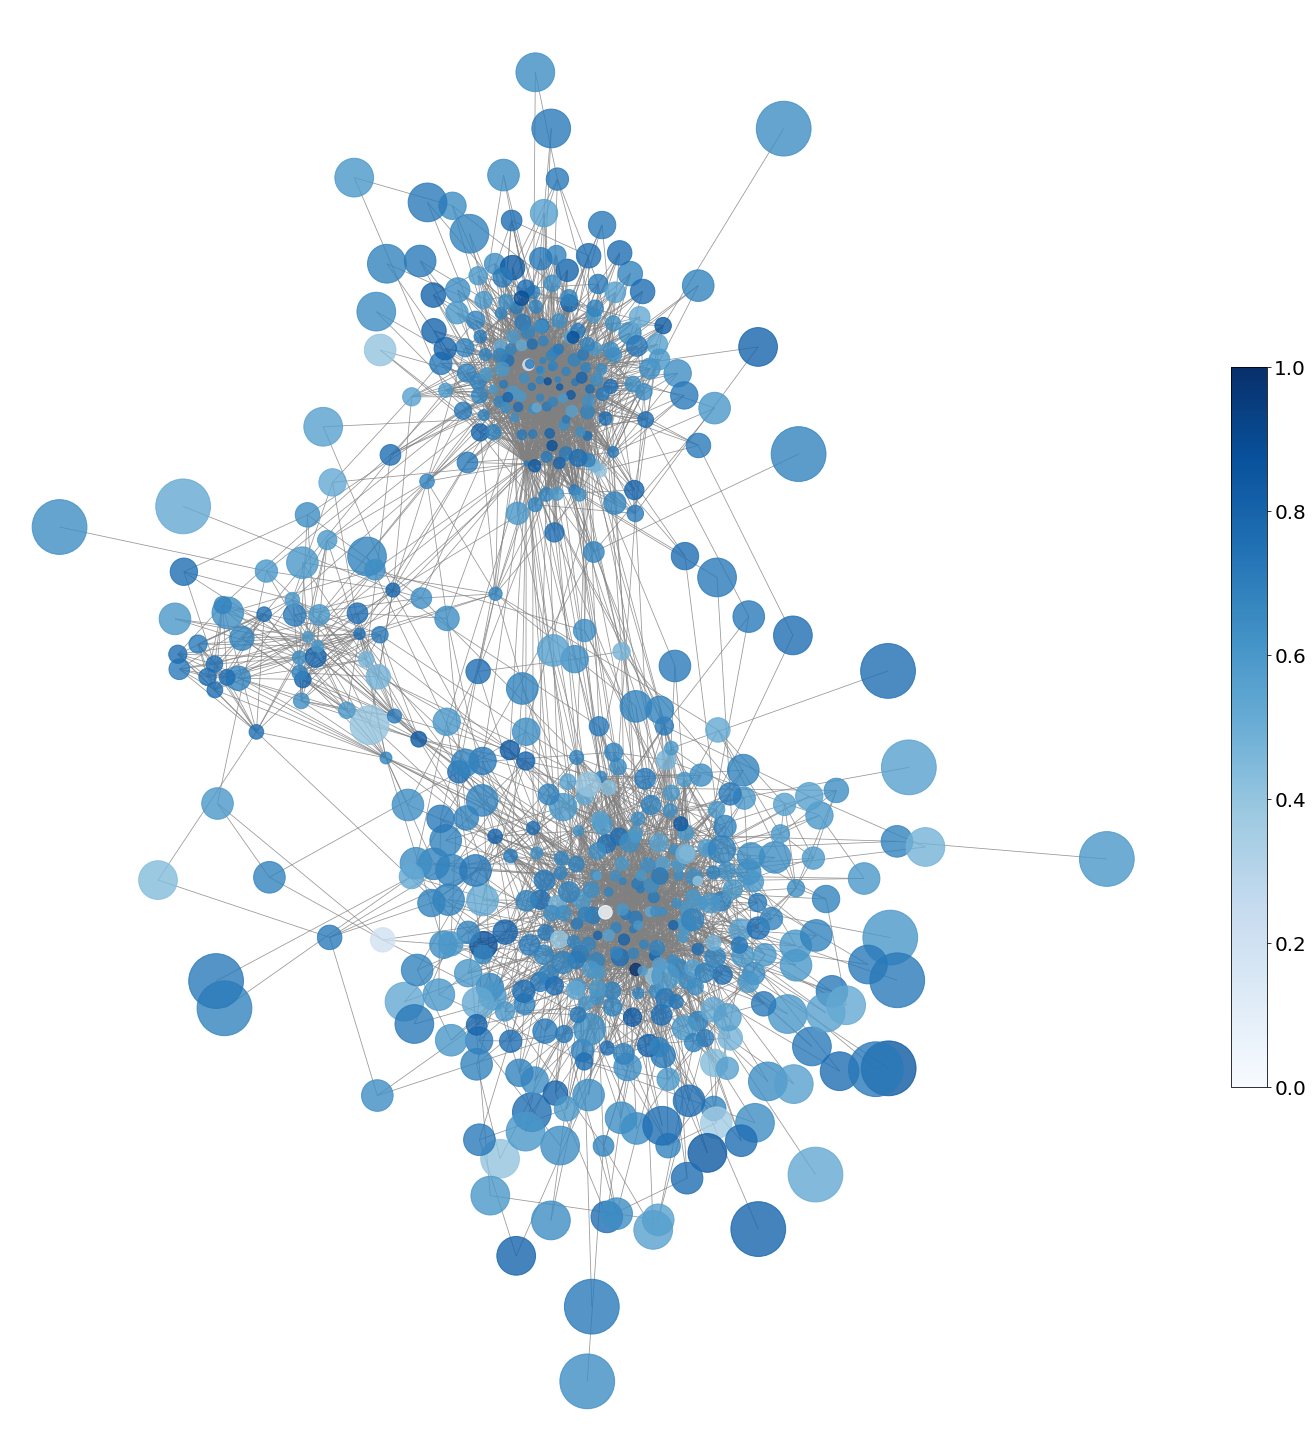

In [10]:
# G = nx.karate_club_graph()
# # print("Node Degree")
# n = 0
# edges = []

# for v in G:
#     a = f"{G.degree(v):6}"
# #     print(f"{v:4} {G.degree(v):6}")
#     edges.append(a)
#     n = n + 1
# print('There are ' + str(n) + ' agents')


# ########################### Make Adjacency Matrix #####################################
# ZKC_graph = nx.karate_club_graph()
# G = nx.convert_matrix.to_numpy_matrix(ZKC_graph)
# print(G)

# # n = 0
# # for v in ZKC_graph:
# #     a = f"{v:4} {G.degree(v):6}"
# #     print(f"{v:4} {G.degree(v):6}")
# #     n = n + 1

# ############################ Make Innate Opinion ################################

### Import fixed opinion
# df = pd.read_csv ('Karate Innate Opinion.csv')
# s_1 = np.array(df[df.columns[1]])
# s_use = s_1.flatten()   # Convert array to a list for later operation
# s_use = s_use.tolist()

### Random Innate opinion

new_s = [i * 30 for i in s_use]
df = pd.DataFrame(new_s, columns=['Opinion']) #create a datafram with index at column 1, opinion at column 2



def node_edge(G, n):
    edges =[]
    for v in range(n):
        a = np.array(np.nonzero(G[v])[0])
        edge = len(a)
#         print(edge)
        edges.append(edge)
        
    return edges

node_edges = node_edge(G, n)
# print(node_edges)

node_sizes =[]
for i in node_edges:
    node_size = 1/i*3000
    node_sizes.append(node_size)
    
# print(node_sizes)

######################### Calculate Key Values & Visualization #######################################3
L = scipy.sparse.csgraph.laplacian(G, normed=False)  # Return the Laplacian matrix
A = np.linalg.inv(np.identity(n) + L)  # A = (I + L)^(-1)\n  Stanford paper theory
m = num_edges(L, n)                    # call the function to calculate the number of edges
columnsum_ij = np.sum(A, axis=0)
print(columnsum_ij)
print(n)
# what the twitter graph looks like 
nxG = nx.from_numpy_matrix(G)          
plt.figure(figsize=(20, 20))

# Fix seed - fix network shape
my_pos = nx.spring_layout(nxG, seed = 19)
nx.draw(nxG, pos= my_pos, with_labels=False, node_color=df['Opinion'].astype(int),cmap=plt.cm.Blues, node_size= node_sizes, edge_color='grey', width=0.8, font_color='black',font_size=26, font_weight='bold', alpha=0.8)
#nx.draw(nxG, pos = my_pos, with_labels=False, node_color=color_map, node_size= node_sizes, edge_color='grey', width=0.5, font_color='white',font_size=9, font_weight='bold')
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin = 0, vmax=1))
cbar = plt.colorbar(sm, shrink = 0.5)
tick_font_size = 20
cbar.ax.tick_params(labelsize=tick_font_size)
plt.show()

# if we want to customize the color bar range to min/max s
# vmin = min(s)
# vmax = max(s)
# sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin = vmin, vmax=vmax))
# sm._A = []
# plt.colorbar(sm,shrink=0.5)
# plt.show()

In [40]:
# print(G)

### 4. Equilibrium & Polarization  - based on derivation
$$P(z) = z ^T * z $$


In [41]:

## s =  make_innat_opinions(n, c1)
# print('Innate Opinion')
# print(s)
# print('Equilibrium Opinion')
# print(np.dot(A, s))

op = s
y = mean_center(s,n)
# print(y)
innat_pol = np.dot(np.transpose(y), y)[0,0] 
print('Innate_polarization:')
print(innat_pol)

# Test equilibrium polarization
equ_pol = obj_polarization(A, L, s, n)
print('Equi_polarization:')
print(equ_pol)

di = equ_pol-innat_pol
print("Difference:")
print(di)

Innate_polarization:
0.6590698342810327
Equi_polarization:
0.4743762518797978
Difference:
-0.1846935824012349


### Testing players' behavior

In [42]:
def random_play(s,n):  # player randomly choose an agent and randomly change the agent
    
    op = copy.copy(s)
  
    v = random.randint(0,n-1)  # randomly select an agent index
#     print(v)
    new_op = random.randint(0, 1)  # randomly select an opininon between 0 and 1
#     print(new_op)
    
    # Store old opinion
    old_opinion = op[v,0]
    
    #update the opinion
    op[v,0] = new_op 
#     print('Only 1 opinion changed')
#     print(op)
    print("    "+"Agent" + str(v) +" 's opinion " + str(old_opinion) + " changed to "+ str(new_op))
    por = obj_polarization(A, L, op, n)
    
    #restore op op array to innate opinion
    op[v] = old_opinion
    print("Network reaches equilibrium Polarization: " + str(por))
#     print('Should be restored')
#     print(op)
    return (v, new_op, por)





In [43]:
def random_play1(s,n):  # player randomly choose an agent and randomly change the agent
    
    op = copy.copy(s)
#     max_opi_option = random.uniform(0, 1)   # options that maximizer have
    
    v = random.randint(0,n-1)  # randomly select an agent index
#     print(v)
#     v = 1
    new_op = random.uniform(0, 1)  # randomly select an opininon between 0 and 1
    #new_op = 0
#     print(new_op)
    
    # Store old opinion
    old_opinion = op[v,0]
    
    #update the opinion
    op[v,0] = new_op 
#     print('Only 1 opinion changed')
#     print(op)
    print("    "+"Agent" + str(v) +" 's opinion " + str(old_opinion) + " changed to "+ str(new_op))
    por = obj_polarization(A, L, op, n)
    
    #restore op op array to innate opinion
    op[v] = old_opinion
    print("Network reaches equilibrium Polarization: " + str(por))
#     print('Should be restored')
#     print(op)
    return (v, new_op, por)





In [44]:
## Testing to see if random_play works -- NO NEED TO RUN
# min_touched =[]
# (v1, maxmize_op, innat_equi_por, max_por) = choose_max_vertex(s, n, min_touched)
# print(v1, maxmize_op, innat_equi_por, max_por)

In [45]:
## Testing to see if random_play works -- NO NEED TO RUN
# (v1, max_opinion, max_pol) = random_play(s,n)
# (v2, min_opinion, min_pol) = random_play(s,n)

In [46]:
def maximizer_fir_play(s,n,min_touched):    # maxmizer first-time play, greedy algorithm
    op = copy.copy(s)

    print('Maximizer Play')

    max_champion = choose_max_vertex(op, n, min_touched) # The best choice among all opinions and vertexs, function is in "pure_strategy_selection.ipynb"
    (v1, max_opinion, innate_obj, max_pol) = max_champion # find agent v1, and max_opinion that can maxmize the equi_polarization(max_pol)

    if v1 == None:   # if maximizer cannot find one
        print('Maximizer fail')

    else:
        print("                                ")
        print("Maximizer finds its target agent:")
#         print('v1', 'changed_opinion', 'innate_obj', 'obj')
#         print(max_champion)

        #Store innate_op of the max_selected vertex
        old_opinion_max = op[v1, 0]
        ##### change the agent's opinion with best action(agent v1, max_op)
        op[v1,0] = max_opinion
        ## check if agent's opinionis is changed or not
        print("    "+"Agent" + str(v1) +" 's opinion " + str(old_opinion_max) + " changed to "+ str(max_opinion))
        print("Network reaches equilibrium Polarization: " + str(max_pol))


    return(v1, max_opinion, max_pol)

In [47]:
# max_touched = []
# min_touched = []
# (v1, max_opinion, max_pol) = maximizer_fir_play(s,n,min_touched)
# print(v1, max_opinion, max_pol)

In [48]:
##### minimizer first-time play, greedy algorithm
def minimizer_fir_play(s,n,max_touched): 
    
    op = copy.copy(s)
    print('_______________________')
    print('Minimizer Play')
#     print('Only 1 opinion changed')
#     print(op)
    
    min_champion = choose_min_vertex(op, n, max_touched)
    (v2, min_opinion, innat_equi_por, min_pol) = min_champion
    
   #Store innate_op of the min_selected vertex
    old_opinion_min = op[v2,0]
    
    if v2 == None:
        print('Minimizer fail')

    else:
        print("                                ")
        print("Minimizer finds its target agent:")

        ##### change the agent's opinion
        op[v2,0] = min_opinion   #-------------------------------------------------> store minimize strategy


        print("    "+"Agent" + str(v2) +" 's opinion " + str(old_opinion_min) + " changed to "+ str(min_opinion))

        print("Network reaches equilibrium Polarization: " + str(min_pol))
#         print('2 opinion changed')
#         print(op)

    return (v2,min_opinion, min_pol)

In [49]:
# max_touched = []
# min_touched = []
# (v2, min_opinion, min_pol) = minimizer_fir_play(s,n,max_touched)
# print(v2, min_opinion, min_pol)

In [50]:
## Testing above functions
# min_touched=[]
# max_touched=[]
# # Game start from maximizer random play
# print('Maximizer random selection')
# (v1, max_opinion, max_pol) = random_play(s,n)
# max_touched.append(v1)
# # print('v1, max_opinion, max_pol')
# # print(v1, max_opinion, max_pol)
# # store maximizer play history, using agent(row) and changed opinion(column) as indicator to locate history




# # Game start from minimizer random play 
# print('Minimizer random selection')
# (v2, min_opinion, min_pol) = minimizer_fir_play(s,n,max_touched)
# min_touched.append(v2)



In [51]:
# Row are Column are depended on min and max's choice: agent v and opinion 
def row_index(v2, min_opinion):
    row = 11*v2 + min_opinion*10 
    return int(row)
def column_index(v1,max_opinion):
    column = 2*v1 + max_opinion
    return int(column)  #the python dataframe index

### Mixed Strategy Payoff


In [52]:
def make_payoff_row(op1,v2):
    payoff_row = np.zeros(2*n)

#     print('one opinion changed -min')
#     print(op1)
    for column in range(2*n):
#         print(column)
        v1 = int(column/2)  #i.e., column 11 is agent 5, opinion 1
        max_opinion = column%2
#         print(v1, max_opinion)
        # update the maximizer's change to the opinion array that has changed by minimizer(op1)
        op2 = copy.copy(op1)
#         temp = op1[v1]
        op2[v1,0] = max_opinion

        # calculate the polarization with both max and min's action
        payoff_row[column] = obj_polarization(A, L, op2, n)
#         op1[v1,0] = temp # restore
#         print(op2,payoff_row[column])

        ############# CAN DELETE 
#         if column==33:
# #         print('max_opinion')
# #         print(v1, max_opinion)
#             print('_________________________Payoff row start')
#             print('two opinion changed -min +  max')
#             print(op2)
        
    # when v1 == v2, the polarization should be negative for max, infinet for min. 
    # Replace the the column_index of agent v2 with 0 for max
    j_1 = 2*v2 + 0
    j_2 = 2*v2 + 1
    payoff_row[j_1] = -100
    payoff_row[j_2] = -100
    
    return payoff_row

In [53]:
# #(1,0) (2,0.3928571428571428)
# op1=copy.copy(s)
# print(op1)

op1 = copy.copy(s)
# print(op1)
op1[2,0] = 1  #op1 is the opinion array that updated by minimizer
# print(op1)
payoff_row_1 = make_payoff_row(op1,2)
print(payoff_row_1)


[   0.8507    0.7248    0.746     0.6309 -100.     -100.        0.7452
    0.6778    0.7674    0.7225    0.8768    0.7506    0.8218    0.6953
    0.8079    0.6942    0.7735    0.6947    0.7832    0.6826    0.7835
    0.6943    0.7623    0.6737    0.7239    0.6757    0.7744    0.7054
    0.8208    0.7314    0.7949    0.677     0.7828    0.7082    0.7929
    0.6449    0.8038    0.7076    0.768     0.6796]


### Minimizer Mixed Strategy

In [54]:
#NEEDDDDDDD UPDAE

# Calculate polarization of minimizer's Mixed Strategy
def mixed_min_polarization(s,v2,weight_op,fla_max_fre):

    op1 =  copy.copy(s) # make a copy of the innate opinion array 
    op1[v2,0] = weight_op # then only updated by minimizer's current change
#     print('Min update')
#     print(v2, weight_op)
    # calculate the polarization with both min(did here) and max's action(in make_payoff_row)
    payoff_row = make_payoff_row(op1,v2)  # the vector list out 2*n payoffs after min's action combine with 2*n possible max's actions
    #print(payoff_row)

    # Replace the the column_index of agent v2 with 100 for min
    j_1 = 2*v2 + 0
    j_2 = 2*v2 + 1
    payoff_row[j_1] = 100
    payoff_row[j_2] = 100
    
#     print('Min Payoff Row')
#     print(payoff_row)
    #calculate fictitious payoff - equi_min  
    payoff_cal = payoff_row * fla_max_fre # fla_max_fre recorded the frequency of each maximizer's action, frequency sum = 1
                                             # payoff (2*n array) * maximizer_action_frequency (2*n array)
# can DELETE - use to check if function works as expected
#     if v2 ==6 and v1==16:
#         print('Payoff row')
#         column = column_index(16,1)
#         print(payoff_row[column],column)
#         print('fla_max_fre')
#         print(np.nonzero(fla_max_fre))
#         print(fla_max_fre [np.nonzero(fla_max_fre)])
#         print('compare to: '+str(fla_max_fre[column]))
    
    mixed_pol = np.sum(payoff_cal) # add up all, calculate average/expected payoff


#     print('min_mixed_polarization')
#     print(mixed_pol)
        # Replace the the column_index of agent v2 with 100 for min

    payoff_row[j_1] = -100
    payoff_row[j_2] = -100

    return (mixed_pol,payoff_row)


In [55]:
# # op2=op
# # op2[0,0]=1
# # min_opinion1 = derivate_s(op2,n,1)
# # # print(min_opinion1)
# # min_opinion2 = derivate_s1(op2,n,1)
# # print(min_opinion2)
# v2 = 254
# min_opinion = 0
# (mixed_pol, payoff_row) = mixed_min_polarization(s,v2,min_opinion,fla_max_fre)
# print(np.nonzero(fla_max_fre))

In [56]:
def derivate_s(op,n,v2):
               #op - opinion array that updated by maximizer
    c = [1/n] * n
#     print(c)
    sum_term = 0
    j = 0

    sum_term = np.dot(np.dot((A-c),(A[v2]-c)),op)  # sum up all terms
    
    term_out = op[v2]*np.dot((A[v2]-c),(A[v2]-c)) # exclude the term that j = v2
    sum_s = sum_term - term_out    # numerator
    
    s_star = -sum_s/np.dot((A[v2]-c),(A[v2]-c))
    s_star = s_star[0] #take value out of array
    min_opinion =min(max(0,s_star),1)
    
#     print('Min opinion-should be unique')
#     print(min_opinion)
    return min_opinion

# def derivate_s1(op,n,v2):
#                #op - opinion array that updated by maximizer
#     c = [1/n] * n
# #     print(c)
#     sum_term = 0
#     j = 0
#     for j in range(0,n):
#         term = op[j]*np.dot(np.transpose(A[j]-c),(A[v2]-c))
# #             print(A[j])
# #             print(A[v])
#         sum_term = sum_term + term  # sum up all terms
    
#     term_out = op[v2]*np.dot(np.transpose(A[v2]-c),(A[v2]-c)) # exclude the term that j = v2
#     sum_s = sum_term - term_out    # numerator
    
#     s_star = -sum_s/np.dot(np.transpose(A[v2]-c),(A[v2]-c))
#     s_star = s_star[0] #take value out of array
#     min_opinion =min(max(0,s_star),1)
            
#     return min_opinion



def min_mixed_opinion(op, n, v2, fla_max_fre):
    
    weight_op = 0
    
    # loop for each max_action(in total 2*n) 
    for column in range(2*n):

        if fla_max_fre[column] !=0:
            v1 = int(column/2)  #i.e., column 11 is agent 5, opinion 1
            max_opinion = column%2
            
##             temp = op[v1,0] 
          
##             op[v1,0]= max_opinion #update innate opinion array with max_action  

            min_opinion = derivate_s(op, n, v2)# find min_s_star for each max_action
#             print(fla_max_fre[column],min_opinion)
            print(min_opinion)
            op1 = copy.copy(op)
            op1[v2] = min_opinion
            min_por = obj_polarization(A, L, op1, n)
            #(min_por, row) = mixed_min_polarization(s, v2, min_opinion,fla_max_fre)

    
            weight_op = weight_op + fla_max_fre[column]*min_opinion # sum up p_i*s_i

    print('Weighted opinion')
    print(weight_op)
    
    (mixed_por, payoff_row) = mixed_min_polarization(s, v2, weight_op,fla_max_fre)
    
    print('Weighted polarization')
    print(mixed_por)
    
    return(weight_op,payoff_row,mixed_por)  

In [57]:
## Print out weighted opinion proved that we need to do this step insetead of min_mixed_opinion - we are weighting
# different min_opinion here
def min_mixed_opinion_1(s, n, v2, fla_max_fre):
    
    weight_op = 0
    
    # loop for each max_action(in total 2*n) 
    for column in range(2*n):

        if fla_max_fre[column] !=0:
            v1 = int(column/2)  #i.e., column 11 is agent 5, opinion 1
            max_opinion = column%2
            op = copy.copy(s)
            op[v1] = max_opinion
#             print(op)

#             print('Weight')
#             print(fla_max_fre[column])
            min_opinion = derivate_s(op, n, v2)# find min_s_star for each max_action


            
            op1 = copy.copy(op)
            op1[v2] = min_opinion   #after max action, update min action on opinion array
#             print(min_opinion)
            min_por = obj_polarization(A, L, op1, n)
            t = 0  
            weight_op = weight_op + fla_max_fre[column]*min_opinion # sum up p_i*s_i
            
        #can delete           
#             if v2==6 and v1==16:
#                 print('Max action')
#                 print(v1,max_opinion)
#                 print('Weight, Min_opinion')
#                 print(fla_max_fre[column],min_opinion)
#                 print(op1)
            #(min_por, row) = mixed_min_polarization(s, v2, min_opinion,fla_max_fre)

#     print(weight_op)

#     print('Weighted opinion')
#     print(weight_op)
    
  
    (mixed_por, payoff_row) = mixed_min_polarization(s, v2, weight_op,fla_max_fre)
#     print('Weighted polarization')
#     print(mixed_por)
#     print('fla_max_fre')
#     print(np.nonzero(fla_max_fre))
#     print(fla_max_fre [np.nonzero(fla_max_fre)])
#         print('compare to: '+str(fla_max_fre[column]))
    return(weight_op,payoff_row,mixed_por)  

In [58]:
# op=copy.copy(s)
# op[21] = 1
# print(op)
# # print(21,fla_max_fre)
# v2 = 6
(weight_op_1,payoff_row,min_por) = min_mixed_opinion_1(s, n, v2, fla_max_fre)


NameError: name 'v2' is not defined

In [59]:
# Minimizer search: Go through each agent 

def mixed_choose_min_vertex(s, n, v1, max_opinion, max_touched, fla_max_fre):
    # current polarization that changed by maximizer, "innate" objective that min start with
    op = copy.copy(s)
    op[v1,0] = max_opinion
#     print('Check if op has been updated by Maximizer')
#     print(op)
    min_por = obj_polarization(A, L, op, n) #min_por- set a standard to compare with pol after min's action
    maxup_por = min_por # store innate max updated polarization
#     print('check maxup por')
#     print(maxup_por)
#     payoffs = []    # create an empty list to store all polarizations   
    champion = (None, None, 0, None)  # assume the best action is champion

    all = list(range(n))    # for all agent 
    C1 = [x for x in all if x not in max_touched]  # for the vertice that Maximizer has not touched
    
    for v2 in C1:  
#         print('_________________________________')
#         print('Min start with agent '+ str(v2) )
        (changed_opinion, payoff_row, por) =  min_mixed_opinion_1(s, n, v2, fla_max_fre) # find the best new_op option           
#         print('changed opinion, por, Maxup_por')
#         print(changed_opinion, por, maxup_por)

        if por < min_por:  # if the recent polarization is smaller than the minimum polarization in the history
            min_por = por
                                 # update the recent option as champion
            champion = (v2, changed_opinion, payoff_row, min_por)  
#         else:
#             print('Innate polarization is smaller than Min action')

    return (champion)  # find the best minimizer's action after going through every new_op option of every agent


In [60]:
# print('v1,max_opinion')
# print(v1,max_opinion)
v1 = 16
max_opinion = 1
champion = mixed_choose_min_vertex(s, n, v1, max_opinion, max_touched, fla_max_fre)
# print(champion)

NameError: name 'max_touched' is not defined

In [61]:
####Op has been updated by maximizer, fla_max_fre includes max's hisotry, so minimizer react to the innate op after that
def mixed_min_play(s,v1,max_opinion,n, max_touched,fla_max_fre): 

    print('_______________________')
    print('Minimizer Play')
#     print('Only 1 opinion changed')
#     print(op)
    
    min_champion = mixed_choose_min_vertex(s, n, v1, max_opinion, max_touched, fla_max_fre)
    (v2, min_opinion, payoff_row, min_pol) = min_champion
    
    if v2 == None:    # if minimizer cannot find a action to minimize polarization after maximizer's action
        print('Minimizer fail')

    else:
        print("                                ")
        print("Minimizer finds its target agent:")
#         print('v2', 'changed_opinion', 'innate_obj', 'obj')
#         print(v2, min_opinion, innat_equi_por, min_pol)

        # Store innate_op of the min_selected vertex
        old_opinion_min = op[v2,0]

        print("    "+"Agent" + str(v2) +" 's opinion " + str(old_opinion_min) + " changed to "+ str(min_opinion))
        print('fla_max_fre')
        print(np.nonzero(fla_max_fre))
        print(fla_max_fre [np.nonzero(fla_max_fre)])


#         print("Payoff row")
#         print(payoff_row)
#         print("Network reaches equilibrium Polarization: " + str(min_pol))
#         print('2 opinion changed')
    return (v2, payoff_row, min_opinion, min_pol)                 

In [62]:
print(max_touched)
(v2, payoff_row, min_opinion, polarization) = mixed_min_play(s,v1,max_opinion,n, max_touched,fla_max_fre)
# print('v2, payoff_row, min_opinion, polarization')
# print(v2, payoff_row, min_opinion, polarization)

NameError: name 'max_touched' is not defined

### Maximizer Mixed Strategy

In [63]:
####Op has been updated by minimizer, fla_min_fre includes min's hisotry, so maxmizer react to the innate op after that
def mixed_max_polarization(payoff_matrix,v1,max_opinion,fla_min_fre):

    # create payoff matrix for maxmizer
    column = int(column_index(v1,max_opinion))
#     print(payoff_matrix)
#     print("column"+str(column))
    payoff_vector = payoff_matrix[:,column]
    
#     print('payoff vector')
#     print(payoff_vector)

    #calculate fictitious payoff - equi_max   
    payoff_cal = payoff_vector * fla_min_fre #payoff * frequency
    
#     print('max_payoff_calculation')
#     print(payoff_cal)
    mixed_pol = np.sum(payoff_cal) # add up
#     print("Max_mixed_polarization")
#     print(mixed_pol)

    return mixed_pol


In [64]:
# mixed_pol = mixed_max_polarization(payoff_matrix,v1,max_opinion, fla_min_fre)

In [65]:
# determines if value of opinion at v should be set to 0 or 1 to maximize equilibrium polarization 
def max_mixed_opinion(payoff_matrix, n, v1, fla_min_fre):
    
    por_arr = np.zeros(2)  # create a two_element array to store polarization value of each option


    max_opi_option = [0, 1.0]   # Maximizer has two options to change agent v1's opinion
    
    # objective if set opinion to 0, 1.0
    j = 0
    for new_op in max_opi_option:
#         print('change op to '+ str(i/10))
        max_opinion = new_op

        por_arr[j] = mixed_max_polarization(payoff_matrix,v1,max_opinion, fla_min_fre)
    
        j = j + 1   # index increase 1, put the polarization in array

#     print('Polarization Options')
#     print(por_arr)
    
    maxmize_op = np.argmax(por_arr)  # the index of maximum polarization = max_opinion --[0,1]
    max_por = np.max(por_arr)        # find the maximum polarization in the record
 
#     print('new_op', 'innat_equi_por', 'max_por')
#     print(maxmize_op, innat_equi_por, max_por)

    return (maxmize_op, max_por)

In [66]:
# fla_min_fre = [0, 0, 0, 0, 0.65, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.35, 0, 0, 0]
# v1 = 2
# champion = max_mixed_opinion(payoff_matrix, n, v1, v2, fla_min_fre)
# print(champion)

In [67]:
# determine which agent maximizer should select to maximizer the equilibrium polarization
def mixed_choose_max_vertex(payoff_matrix,op, n, min_touched, fla_min_fre):
#     print('Check if op has been updated by minimizer')
#     print(op)
    max_por = obj_polarization(A, L, op, n)  # use "innate"(after min action) polarization as a comparable standard to find max_por
    minup_por = max_por # store innate min_update polarization
#     print('check minup por')
#     print(minup_por)
    champion = (None, None, max_por)  # assume champion is the best action

    all = list(range(n))    # for all agent 
    C1 = [x for x in all if x not in min_touched]  # for the vertice that Minimizer has not touched
    for v1 in C1:  
#             print('Maximizer start from agent'+str(v1))
            (changed_opinion, por) = max_mixed_opinion(payoff_matrix, n, v1, fla_min_fre)
#             print('changed_opinion, por, minup_por')
#             print(changed_opinion, por,minup_por)
            
            if por > max_por: # if the polarization of most recent action > maximum polarization of previous actions
                max_por = por
                champion = (v1, changed_opinion,max_por)   # save the this action as champion    
#             else:
#                 print('Innate polarization is bigger than max action')
 
    return (champion)


In [68]:
print(payoff_matrix)
champion = mixed_choose_max_vertex(payoff_matrix,op, n, min_touched, fla_min_fre)

NameError: name 'payoff_matrix' is not defined

In [69]:
# # min_touched = []
# # payoff_matrix = np.empty((0, 2*n), float)
# # fla_min_fre = np.empty((0,n))
# # champion = mixed_choose_max_vertex(payoff_matrix,op, n, min_touched, fla_min_fre)
# # print(champion)
# print(c1)
# vertices = np.where(c1)
# print(vertices)
# por=0
# for i in c1:
#     print(i)
#     max_por = 0.75
#     if por > max_por:
#         max_por = por
#         print('yes')
#     else:
#         print('por<max')

In [70]:
def mixed_max_play(payoff_matrix,s,v2,min_opinion,n,min_touched,fla_min_fre): 
    op = copy.copy(s)   # op is a copy of innate opinion
    
    #update innat opinion 
    op[v2,0] = min_opinion  # Op has been updated by minimizer, so maximizer react to the innate op after that
    

    max_champion = mixed_choose_max_vertex(payoff_matrix,op, n, min_touched, fla_min_fre) # The best choice among all opinions and vertexs
    (v1, max_opinion, max_pol) = max_champion

    if v1 == None:
        print('Maximizer fail')

    else:
        print("                                ")
        print("Maximizer finds its target agent:")
        #Store innate_op of the max_selected vertex
        old_opinion_max = op[v1, 0]
        
        ## check if agent's opinionis is changed or not
        print("    "+"Agent" + str(v1) +" 's opinion " + str(old_opinion_max) + " changed to "+ str(max_opinion))
#         print("Network reaches equilibrium Polarization: " + str(max_pol))
#         print('2 opinion changed')
#         print(op)

    return(v1, max_opinion, max_pol)

In [71]:
# # # Testing function -- NO NEED TO RUN
# min_touched = []
# v2 = 0
# min_opinion = 0
# b = mixed_max_play(payoff_matrix,s,v2,min_opinion,n,min_touched,fla_min_fre)
# print('v1,max_opinion,max_pol')
# print(b)

### Testing Player's Behavior

# 5. Innate Op and Game

# Fictitious Play Start !


In [72]:
op = s
y = mean_center(s,n)
# print(y)
innat_pol = np.dot(np.transpose(y), y)[0,0] 
print('Innate_polarization:')
print(innat_pol)

# Test equilibrium polarization
equ_pol = obj_polarization(A, L, op, n)
print('Equi_polarization:')
print(equ_pol)

di = equ_pol-innat_pol
print("Difference:")
print(di)



Innate_polarization:
0.6590698342810327
Equi_polarization:
0.4743762518797978
Difference:
-0.1846935824012349


In [73]:
Network = 'Karate'
memory = 50


# with open('Network_'+str(Network)+'.txt', "a") as fi:
#     print('Innate Opinion', file=fi)
#     print(s, file=fi)
#     print('Adjacency Matrix', file=fi)
#     print(G,file=fi)

# Game Preparation
def push(obj, element):
    if len(obj) >= memory:
        obj.pop(0)
        print('pop')
    obj.append(element)
    return obj


In [82]:
# Game Parameters
Game_rounds =301 # Rounds + 1- use for printing data
memory = 5
def all_fre_limited_touch(s, n):
    # Preparation for the game
    op = copy.copy(s)
    payoff_matrix = np.empty((0, 2*n), float)
    max_history = np.zeros([n, 2])  # n*2 matrix, agent i & opinion options
    min_history = []  # append a list of (agent i, min_opinion), min_opinion can be any value
#     print(type(min_history))

    max_history_last_100 = np.zeros([n, 2]) 
    min_history_last_100= []

    max_touched = []
    min_touched = []
    min_touched_all = []
    min_touched_last_100 =[]
    print('min_touched')
    print(min_touched)
    
    
    # Game start from maximizer random play
    print('Maximizer first selection')
    (v1, max_opinion, max_pol) = random_play(op,n)   # Maximizer does random action 
    #(v1, max_opinion, max_pol) = maximizer_fir_play(s,n,min_touched)
#     (v1, max_opinion, max_pol) = (11, 1, 0.14833274000237331)
    First_max = (v1, max_opinion, max_pol) 


#     (v1, max_opinion, max_pol) = maximizer_fir_play(s,n,max_touched)

    # Maximizer start with greedy play
    # (v1, max_opinion, max_pol) = maximizer_fir_play(s,n,min_touched)   # Maximizer choose action greedily
    max_touched.append(v1)    # save Maximizer's action history

    # store maximizer play history, using agent(row) and changed opinion(column) as indicator to locate history
    max_history[v1,int(max_opinion)] = max_history[v1,int(max_opinion)] +1
    # print('max_history')
    # print(max_history)
    print('history at spot')
    print(max_history[v1,int(max_opinion)])

    max_frequency = max_history/1  # its frequency, only played  1 time so far, divided by 1 
    # print('fre_max at spot')
    # print(max_frequency[v1,int(max_opinion)])

    fla_max_fre = max_frequency.flatten()   # flatten the n*2 matrix to a 2n*1 matrix
                                            # so we can multiply the freuency (2n*1)with payoff array (1*2n) 
                                            # to get average payoff of fictitious play
    print('fre_max at spot')
    print(fla_max_fre)

    column = int(column_index(v1,max_opinion))    # the frequency of maximizer's most recent action (v1,max_opinion)

    print(fla_max_fre[column])

    # print(np.shape(fla_max_fre.shape))


    # if game start from minimizer random play - make sure two random play are not same agent!!!
    print('Minimizer first selection')
    (v2, min_opinion, min_pol) = random_play(op,n) 
    #(v2, min_opinion, min_pol) = minimizer_fir_play(s,n,min_touched)
    
#     (v2, min_opinion, min_pol) = (29, 1, 0.5933309600094931)
    First_min = (v2, min_opinion, min_pol)

    if v1==v2:   # if Max and Min randomly selected the same agent, then we need to restart - cannot choose same agent
        sys.exit()

    # Minimizer start with greedy play
    # (v2, min_opinion, min_pol) = minimizer_fir_play(s,n,max_touched)

    min_touched.append(v2)
   

    # store minimizer play history
    min_history.append((v2,min_opinion))
    print('min_history')
    print(min_history)


    counter=collections.Counter(min_history)  #return a dictionary include {'min_option': count of this choice}
    print(counter)
    fla_min_fre = np.array(list(counter.values()))/1 #return only frequency of all min options in order
#     print('fla_min_fre')
#     print(fla_min_fre)


    (a,payoff_row) = mixed_min_polarization(s,v2,min_opinion,fla_max_fre)
    payoff_matrix = np.vstack([payoff_matrix, payoff_row])
#     print('Payoff Matrix')
#     print(payoff_matrix)
    print('fla_min_fre at the spot')
    min_counter = dict(counter)
    print(min_counter) 
    print(min_counter[(v2,min_opinion)]) 
#     print(min_counter[(v2,min_opinion)]/(i+1)) #get the value from dictionary by using key (v2,opinion)


    equi_min = min_pol
    equi_max = max_pol
    # print(equi_min)
    # print(equi_max)



    Flag = 0

    i = 0
    while Flag == 0: 
        i = i + 1
        print("Game " + str(i))
        print("_____________________")

    #     if max_pol == min_pol:
        if i == Game_rounds:            # i == # of iterations you want to run + 2
                                # because Game 101 is skipped for collecting data, to get 200 game result, we need to run 201 iteration
            print('min_recent_'+str(memory)+'_touched')# then stop at Game 202
            print(min_touched)
            print('max_recent_'+str(memory)+'_touched')
            print(max_touched)
            print('Min last 100 action')
            print(min_touched_last_100)

            break

        elif equi_min == equi_max:
            print("Reached Nash Equilibrium at game"+ str(i) + "and Equi_Por = " + str(equi_min))
            print('max_distribution')
            print(max_frequency)
            print('min_distribution')
            print(fla_min_fre)
            Flag = 1
            break
        ############################## maximizer play  
        else:
            if i == Game_rounds-100:    #if Game_round = 200, after 100 iteration, Game 101 print previous historical result
    #             max_touched_100 = max_touched 
    #             min_touched_100 = min_touched
    #             max_fre_100 = max_frequency  # store the max_frequency of first 100 iterataions
    #             print('max_history')
    #             print(max_history)
    #             min_fre_100 = fla_min_fre  # max_frequency of first 100 iterations
    #             print('min_history')
    #             print(min_history)
    # Remove max frequncy less than 0.1--
                max_history_last_100 = np.zeros([n, 2]) 
                min_history_last_100 = [] 
                min_touched_last_100 =[]

            (v1, max_opinion, equi_max) = mixed_max_play(payoff_matrix,s,v2,min_opinion,n,min_touched,fla_min_fre)
            max_touched = push(max_touched, v1)
    #         print('min_touched')
    #         print(min_touched)
    #         print('max_touched')
    #         print(max_touched)
    #             print('equi_max')
    #             print(equi_max)
    #         print(v1, max_opinion, max_pol)
            # cumulate strategy 
            max_history[v1,int(max_opinion)] = max_history[v1,int(max_opinion)] +1

            max_history_last_100[v1,int(max_opinion)] = max_history_last_100[v1,int(max_opinion)] +1
    #         print('max_history')
    #         print(max_history)
    #________________________________________________________________
            max_frequency = max_history/(i+1)  # its frequency 
    #         print('max_distribution')
    #         print(max_frequency)
        #     print(i+1) 
            fla_max_fre = max_frequency.flatten() #flaten max_frequency to calculate average payoff
#             print('fla_max_fre')
#             print(fla_max_fre)
            print('fre_max at spot')
            print(fla_max_fre[column])
            # create payoff matrix for maxmizer
            row = int(row_index(v2, min_opinion))
            column = int(column_index(v1,max_opinion))

    # _________________________________________________________________
    #         ######################Visualize Maximizer's selection
    #         La = scipy.sparse.csgraph.laplacian(G, normed=False)

    #         nxG = nx.from_numpy_matrix(G)

    #         color_map = []
    #         for node in nxG:
    #             if node == v1:
    #                 color_map.append('Red')
    #             else: 
    #                 color_map.append('Grey')  

    #         #nxG1 = nx.DiGraph(G)
    #         nx.draw(nxG, node_color=color_map, with_labels=True,node_size = 50)
    #         plt.figure(figsize=(200, 200))
    #         plt.show()



    ############################### minimizer play
            (v2, payoff_row, min_opinion, equi_min) = mixed_min_play(s,v1,max_opinion,n, max_touched,fla_max_fre)
            min_touched = push(min_touched, v2)
            min_touched_all.append(v2) 
            min_touched_last_100.append(v2)
    #         print('min_touched')
    #         print(min_touched)
    #         print('equi_min')
    #         print(equi_min)
    #         print('max_touched')
    #         print(max_touched)
            #         print(v2, min_opinion, min_pol)
            if (v2,min_opinion) in counter.keys():
                payoff_matrix = payoff_matrix # if this min_option is in min_history, no need to update paryoff matrix, only update frequency
                print("Same history")
                print((str(v2),str(min_opinion)))
            else:
                payoff_matrix = np.vstack([payoff_matrix, payoff_row]) # if this is a new option, append to previous matrix
    #                 print('payoff_row')
    #                 print(payoff_row)
            min_history.append((v2,min_opinion))
            min_history_last_100.append((v2,min_opinion))
            #         print('min_history')
            #         print(min_history)
            counter=collections.Counter(min_history)  #return a dictionary include {'min_option': count of this choice}
            #print(counter)
    #         print('counter.keys')
    #         print(counter.keys())
            fla_min_fre = np.array(list(counter.values()))/(i+1) #return only frequency of all min options in order
    #         print('fla_min_fre')
    #         print(fla_min_fre)

    #         print('fla_min_fre at the spot')
    #         min_counter = dict(counter)
    #         print(min_counter[(v2,min_opinion)]/(i+1)) #get the value from dictionary by using key (v2,opinion)

            # create payoff matrix for minimizer
            row = row_index(v2, min_opinion)
            column = column_index(v1,max_opinion)
            #     print('row, column')
            #     print(row, column)

            print("Not Reached Nash Equilibrium at Equi_Min = " + str(equi_min) + " and Equi_Max = "+ str(equi_max)) 
    #         print('min_distribution')
    #         print(fla_min_fre)

            ######################Visualize Minimizer selection
    #         La = scipy.sparse.csgraph.laplacian(G1, normed=False)

    #         nxG = nx.from_numpy_matrix(G1)

    #         color_map = []
    #         for node in nxG:
    #             if node == v2:
    #                 color_map.append('Blue')
    #             else: 
    #                 color_map.append('Grey')  

    #         #nxG1 = nx.DiGraph(G)
    #         nx.draw(nxG, node_color=color_map, with_labels=True)
    #         plt.figure(figsize=(25, 25))
    #         plt.show()
    return (First_max, First_min, max_touched, min_touched, payoff_matrix, min_history, fla_min_fre, min_history_last_100, min_touched_last_100, min_touched_all, max_history, fla_max_fre, max_history_last_100)



In [163]:
G = make_random_network(n, p1)
# G[G.nonzero()] = 1
print(G)

[[0.     0.0243 0.     0.     0.     0.     0.     0.0272 0.     0.
  0.     0.0385 0.     0.0091 0.     0.     0.     0.016  0.0074 0.0236]
 [0.0243 0.     0.     0.     0.0345 0.     0.     0.     0.     0.
  0.     0.     0.0094 0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.0313 0.0235 0.     0.     0.     0.     0.
  0.0189 0.0054 0.     0.     0.     0.0324 0.     0.     0.     0.005 ]
 [0.     0.     0.0313 0.     0.0288 0.0391 0.0002 0.     0.     0.0051
  0.0254 0.     0.0293 0.     0.     0.0071 0.     0.     0.     0.0319]
 [0.     0.0345 0.0235 0.0288 0.     0.0354 0.     0.     0.0185 0.
  0.0368 0.0301 0.     0.0341 0.0006 0.0387 0.0345 0.     0.     0.    ]
 [0.     0.     0.     0.0391 0.0354 0.     0.     0.     0.     0.0046
  0.     0.     0.016  0.03   0.     0.     0.0388 0.     0.     0.    ]
 [0.     0.     0.     0.0002 0.     0.     0.     0.     0.     0.
  0.0026 0.     0.     0.     0.0379 0.     0.0364 0.0067 0.     0.0016]
 [0.0

In [171]:

############################ Make Innate Opinion ################################
### Generate innate opinion array
s = make_innat_opinions(n) 
# print(s)

In [177]:
s[17] =0.8

In [179]:
Experiment = 10

Experiment_note = str('Note: This experiement has initial condition. Game round:'+str(Game_rounds)+'.')
(First_max, First_min, max_touched, min_touched, payoff_matrix, min_history, fla_min_fre, min_history_last_100, min_touched_last_100, min_touched_all, max_history, fla_max_fre, max_history_last_100) = all_fre_limited_touch(s, n)


min_touched
[]
Maximizer first selection
    Agent0 's opinion 0.20738777069383113 changed to 1
Network reaches equilibrium Polarization: 0.6547087520613768
history at spot
1.0
fre_max at spot
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1.0
Minimizer first selection
    Agent1 's opinion 0.6355612075286321 changed to 0
Network reaches equilibrium Polarization: 0.645381419963736
min_history
[(1, 0)]
Counter({(1, 0): 1})
fla_min_fre at the spot
{(1, 0): 1}
1
Game 1
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
fre_max at spot
0.5
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.47816777367986585
fla_max_fre
(array([ 1, 11], dtype=int64),)
[0.5 0.5]
Not Reached Nash Equilibrium at Equi_Min = 0.629960373279

                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.4687207584503688
fla_max_fre
(array([ 1, 11], dtype=int64),)
[0.053 0.947]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.6703236924644347 and Equi_Max = 0.688665160531824
Game 19
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.95
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.4686651877725483
fla_max_fre
(array([ 1, 11], dtype=int64),)
[0.05 0.95]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.670560742178004 and Equi_Max = 0.6879493484703895
Game 20
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.9523809523809523
_____

                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.46821268368172364
fla_max_fre
(array([ 1, 11], dtype=int64),)
[0.029 0.971]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.672490838003136 and Equi_Max = 0.6822647760058976
Game 35
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.9722222222222222
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.4681959242709523
fla_max_fre
(array([ 1, 11], dtype=int64),)
[0.028 0.972]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.6725623173508124 and Equi_Max = 0.6820590424579022
Game 36
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.9729

                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.46801543830880005
fla_max_fre
(array([ 1, 11], dtype=int64),)
[0.019 0.981]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.6733320692168757 and Equi_Max = 0.679864524042645
Game 52
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.9811320754716981
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.4680077761688974
fla_max_fre
(array([ 1, 11], dtype=int64),)
[0.019 0.981]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.6733647463204319 and Equi_Max = 0.6797722054640121
Game 53
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.9814

Not Reached Nash Equilibrium at Equi_Min = 0.6739918190610789 and Equi_Max = 0.6780136863261241
Game 84
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.9882352941176471
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.4678577785124494
fla_max_fre
(array([ 1, 11], dtype=int64),)
[0.012 0.988]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.6740044315888133 and Equi_Max = 0.6779785696371907
Game 85
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.9883720930232558
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.46785488974944367
fla_max_f

Not Reached Nash Equilibrium at Equi_Min = 0.6741722644179206 and Equi_Max = 0.6775122187722562
Game 101
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.9901960784313726
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.46781637290936745
fla_max_fre
(array([ 1, 11], dtype=int64),)
[0.01 0.99]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.674181005649775 and Equi_Max = 0.6774879776990332
Game 102
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.9902912621359223
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.46781436292863526
fla_max_f

                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.4677693210876833
fla_max_fre
(array([ 1, 11], dtype=int64),)
[0.008 0.992]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.6743816549842884 and Equi_Max = 0.676932836912348
Game 132
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.9924812030075187
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.46776811825915904
fla_max_fre
(array([ 1, 11], dtype=int64),)
[0.008 0.992]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.6743867843238314 and Equi_Max = 0.6769186779757588
Game 133
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.99

                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.4677520263640373
fla_max_fre
(array([ 1, 11], dtype=int64),)
[0.007 0.993]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.6744554063679687 and Equi_Max = 0.6767294103533933
Game 148
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.9932885906040269
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.46775106877027833
fla_max_fre
(array([ 1, 11], dtype=int64),)
[0.007 0.993]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.6744594899051068 and Equi_Max = 0.6767181565908722
Game 149
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.9

                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.46772666076935643
fla_max_fre
(array([ 1, 11], dtype=int64),)
[0.006 0.994]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.6745635742821131 and Equi_Max = 0.6764316567187704
Game 180
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.994475138121547
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.46772601261534874
fla_max_fre
(array([ 1, 11], dtype=int64),)
[0.006 0.994]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.6745663382290616 and Equi_Max = 0.6764240577855257
Game 181
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.9

Not Reached Nash Equilibrium at Equi_Min = 0.6746044129466676 and Equi_Max = 0.6763194262574729
Game 196
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.9949238578680203
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.4677165370643728
fla_max_fre
(array([ 1, 11], dtype=int64),)
[0.005 0.995]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.6746067450999069 and Equi_Max = 0.6763130202417578
Game 197
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.9949494949494949
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.4677159956897747
fla_max_

                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.46770237069823856
fla_max_fre
(array([ 1, 11], dtype=int64),)
[0.004 0.996]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.6746671549098483 and Equi_Max = 0.6761472006560427
Game 227
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.9956140350877193
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.46770196269032505
fla_max_fre
(array([ 1, 11], dtype=int64),)
[0.004 0.996]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.6746688947787324 and Equi_Max = 0.6761424281643549
Game 228
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.

                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.46769588939220264
fla_max_fre
(array([ 1, 11], dtype=int64),)
[0.004 0.996]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.674694793126467 and Equi_Max = 0.6760714103169112
Game 244
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.9959183673469387
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.4676955361493526
fla_max_fre
(array([ 1, 11], dtype=int64),)
[0.004 0.996]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.6746962994572968 and Equi_Max = 0.6760672809475874
Game 245
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.99

Not Reached Nash Equilibrium at Equi_Min = 0.6747352001136393 and Equi_Max = 0.675960688702747
Game 274
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.9963636363636363
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.4676861334669459
fla_max_fre
(array([ 1, 11], dtype=int64),)
[0.004 0.996]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.6747363951789206 and Equi_Max = 0.6759574155435457
Game 275
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.9963768115942029
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.46768585524747847
fla_max_

Not Reached Nash Equilibrium at Equi_Min = 0.674753332126394 and Equi_Max = 0.6759110363377081
Game 290
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.9965635738831615
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.4676819114148228
fla_max_fre
(array([ 1, 11], dtype=int64),)
[0.003 0.997]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.6747543991727223 and Equi_Max = 0.6759081149800646
Game 291
_____________________
                                
Maximizer finds its target agent:
    Agent5 's opinion 0.5519151463585465 changed to 1
pop
fre_max at spot
0.9965753424657534
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent17 's opinion 0.3293933849667663 changed to 0.4676816628993404
fla_max_f

In [180]:
# MAXimizer's distribution of LAST 100 iteration 
print('Max_distribution')  
max_l100_fre = max_history_last_100/100
print(max_l100_fre [np.nonzero(max_l100_fre)])
# print for small network
#print(max_history_last_100)
# # Print for Large Network
print(np.nonzero(max_l100_fre))

# MINimizer's Strategy in the last 100 round
print('Min_distribution_last_100')
counter_h=collections.Counter(min_touched_last_100)  #return a dictionary include {'min_option': count of this choice}
print(counter_h.keys())
counter=collections.Counter(min_touched_last_100)
fla_min_fre = np.array(list(counter.values()))/(100) #return only frequency of all min options in order
print('fla_min_fre')
print(fla_min_fre)
# print(min_touched_last_100)


counter_1h=collections.Counter(min_history)  #return a dictionary include {'min_option': count of this choice}
print(counter_1h.keys())
counter_1=collections.Counter(min_touched_all)  #return a dictionary include {'min_option': count of this choice}
# print(counter_1)
fla_min_fre_1 = np.array(list(counter_1.values()))/Game_rounds #return only frequency of all min options in order
print('Min_distribution_all')
print(fla_min_fre_1)
np.set_printoptions(precision=3)

max_fre = max_history/Game_rounds
print('Max_distribution_all')
print(max_fre[np.nonzero(max_fre)])
print([np.nonzero(max_fre)])
    



Max_distribution
[1.]
(array([5], dtype=int64), array([1], dtype=int64))
Min_distribution_last_100
dict_keys([17])
fla_min_fre
[1.]
dict_keys([(1, 0), (17, 0.47816777367986585), (17, 0.4746482974178964), (17, 0.47288855928691165), (17, 0.47183271640832086), (17, 0.4711288211559269), (17, 0.4706260388327884), (17, 0.47024895209043455), (17, 0.4699556624019371), (17, 0.4697210306511391), (17, 0.46952905921866805), (17, 0.4693690830249421), (17, 0.46923371855332796), (17, 0.46911769186337293), (17, 0.46901713539874523), (17, 0.468929148492196), (17, 0.46885151298641725), (17, 0.46878250364794727), (17, 0.4687207584503688), (17, 0.4686651877725483), (17, 0.46861490954023444), (17, 0.46856920205631275), (17, 0.46852746913621035), (17, 0.46848921395944987), (17, 0.4684540191968301), (17, 0.46842153172364276), (17, 0.46839145072995064), (17, 0.4683635183786652), (17, 0.4683375123964339), (17, 0.46831324014635134), (17, 0.46829053384788705), (17, 0.4682692466930767), (17, 0.468249249668861), (

### Min Analyze

In [181]:

print("___________________Min Analyze__________________________________________")
print(np.argmax(s))
print(np.argmin(s))

s_aa = s[:, 0]
my_dict = {index: value for index, value in enumerate(s_aa)}
sorting_s = sorted(my_dict.items(), key=lambda x:x[1])
sorted_S = dict(sorting_s)
print(sorted_S)

___________________Min Analyze__________________________________________
17
0
{0: 0.20738777069383113, 8: 0.24272274993289872, 9: 0.2437569052037651, 6: 0.2543059654403661, 15: 0.26744380515632193, 12: 0.31775214730228263, 14: 0.3186368506482441, 13: 0.346609103825711, 18: 0.4515598070614181, 3: 0.5409266275725597, 4: 0.5461173513670674, 5: 0.5519151463585465, 19: 0.5876798368598868, 11: 0.5901839082988651, 10: 0.6316911101556144, 1: 0.6355612075286321, 16: 0.643511457683655, 2: 0.6646651201512839, 7: 0.7112627748447193, 17: 0.8}


### Max Analyze Centrality

In [175]:
nxG = nx.from_numpy_matrix(G) 

In [8]:
# G = nx.karate_club_graph()
print("_______________Degree Centrality_____________________________")  
plt.figure(figsize =(15, 15))
deg_centrality = nx.degree_centrality(nxG)
sortedDict = sorted(deg_centrality.items(), key=lambda x:x[1])
converted_dict = dict(sortedDict)
print(converted_dict)
print("                           ")
print("_______________Closeness Rank_____________________________")
close_centrality = nx.closeness_centrality(nxG)
sortedDict1 = sorted(close_centrality.items(), key=lambda x:x[1])
converted_dict1 = dict(sortedDict1)
print(converted_dict1)
print("                           ")
print("_______________Page Rank_____________________________")
pr = nx.eigenvector_centrality(nxG)
sortedDict3 = sorted(pr.items(), key=lambda x:x[1])
converted_dict3 = dict(sortedDict3)
print(converted_dict3)

print("                           ")

def gap(op, n):
    ones = np.ones((n, 1))
    x = op - (np.dot(np.transpose(op),ones)/n) * ones
    return abs(x)

gap = gap(s,n)
my_gap = {index: value for index, value in enumerate(gap)}
sorting_gap = sorted(my_gap.items(), key=lambda x:x[1])
sorted_gap = dict(sorting_gap)
print(sorted_gap)



_______________Degree Centrality_____________________________
{40: 0.0018281535648994515, 45: 0.0018281535648994515, 89: 0.0018281535648994515, 121: 0.0018281535648994515, 165: 0.0018281535648994515, 166: 0.0018281535648994515, 196: 0.0018281535648994515, 202: 0.0018281535648994515, 233: 0.0018281535648994515, 253: 0.0018281535648994515, 351: 0.0018281535648994515, 396: 0.0018281535648994515, 411: 0.0018281535648994515, 457: 0.0018281535648994515, 488: 0.0018281535648994515, 490: 0.0018281535648994515, 520: 0.0018281535648994515, 8: 0.003656307129798903, 9: 0.003656307129798903, 18: 0.003656307129798903, 22: 0.003656307129798903, 27: 0.003656307129798903, 31: 0.003656307129798903, 33: 0.003656307129798903, 39: 0.003656307129798903, 67: 0.003656307129798903, 71: 0.003656307129798903, 80: 0.003656307129798903, 94: 0.003656307129798903, 124: 0.003656307129798903, 126: 0.003656307129798903, 127: 0.003656307129798903, 160: 0.003656307129798903, 175: 0.003656307129798903, 181: 0.003656307129

{202: 0.21671949286846276, 490: 0.22668876916701203, 233: 0.22687681459975115, 121: 0.2335610589239966, 396: 0.23710446467273516, 253: 0.23865619546247818, 351: 0.23865619546247818, 181: 0.24257206208425722, 522: 0.24562191288729232, 165: 0.246063877642825, 457: 0.24807256235827665, 31: 0.24954379562043796, 543: 0.25022872827081427, 40: 0.2516099356025759, 8: 0.2526558891454965, 225: 0.255011655011655, 514: 0.2559663079082826, 385: 0.25741176470588234, 9: 0.2589962121212121, 220: 0.2591189009947892, 427: 0.2636144578313253, 141: 0.26386878919440426, 126: 0.26463473633284956, 410: 0.26463473633284956, 449: 0.2647628267182962, 89: 0.26501937984496127, 138: 0.2654051431344008, 175: 0.2657920310981535, 411: 0.2661800486618005, 389: 0.26708984375, 262: 0.26722032242305815, 446: 0.2678746327130264, 205: 0.26853215513009326, 535: 0.2717337307501242, 321: 0.27186878727634195, 199: 0.27200397812033816, 166: 0.27254608868958646, 408: 0.27281795511221946, 347: 0.27309036445332, 188: 0.27391086629

<Figure size 1500x1500 with 0 Axes>

## Cluster Coefficient

In [9]:
print(payoff_matrix)

NameError: name 'payoff_matrix' is not defined

In [78]:
Experiment = '11'
pd.DataFrame(payoff_matrix).to_csv('Karate Payoff Matrix'+ str(Experiment)+'.csv')
with open('Result'+str(Network)+'.'+str(Experiment)+'Pure.txt', "a") as f:
#     print(Experiment_note, file=f)
    print('Initial Condition -(agent, opinion, pol)', file=f)
    print('Innate op'+str(s),file=f)
    print('Adjacency matrix'+ str(G), file=f)
    print('Max:'+ str(First_max), file=f)
    print('Min' + str(First_min), file=f)

    print("In the Last 100 Rounds", file=f) 
    print('_____________________', file=f)
    
    # MAX distribution of LAST 100 iteration 
    print('Max_distribution', file=f)  
    max_l100_fre = max_history_last_100/100
    print(max_l100_fre [np.nonzero(max_l100_fre)], file=f)
    # print for small network
    #print(max_history_last_100, file=f)
    # # Print for Large Network
    print(np.nonzero(max_l100_fre),file=f)

    # MIN Strategy in the last 100 round
    counter=collections.Counter(min_touched_last_100)  #return a dictionary include {'min_option': count of this choice}
    # print(counter)
    fla_min_fre = np.array(list(counter.values()))/100 #return only frequency of all min options in order
#     print('Min_frequency', file=f)
#     print(list(counter.keys()), file=f)
    print('Min_distribution_last_100', file=f)
    print(fla_min_fre, file=f)
    counter_h=collections.Counter(min_history_last_100)  #return a dictionary include {'min_option': count of this choice}
    print(counter_h, file=f)
    
    print('min_recent_'+str(memory)+'_touched', file=f)# then stop at Game 202
    print(min_touched, file=f)
    print('max_recent_'+str(memory)+'_touched', file=f)
    print(max_touched, file=f)
    
    print('In Overall'+str(Game_rounds)+' Rounds', file=f)
    print('_____________________', file=f)
    
    # Max action Overall 
    np.set_printoptions(precision=3)

    max_fre = max_history/Game_rounds
#     print('Max_frequency', file=f)
#     print(max_history, file=f)
    print('Max_distribution', file=f)
    print(max_fre [np.nonzero(max_fre)], file=f)
    print(np.nonzero(max_fre),file=f)


    # Min Strategy in the Overall    
    counter_1=collections.Counter(min_touched_all)  #return a dictionary include {'min_option': count of this choice}
    fla_min_fre_all = np.array(list(counter_1.values()))/Game_rounds #return only frequency of all min options in order
    print('Min_dist_all', file=f)
    print(fla_min_fre_all, file=f)
    print('Min_distribution', file=f)
    counter_a=collections.Counter(min_history)  #return a dictionary include {'min_option': count of this choice}
    print(counter_a, file=f)
#     print(payoff_matrix, file=f)

In [82]:
counter=collections.Counter(min_history) 
print(counter)
fla_min_fre = np.array(list(counter.values()))/Game_rounds
print('fla_min_fre')
print(fla_min_fre)

Counter({(6, 0.0): 358, (29, 1.0): 37, (29, 0.9999999999999999): 5, (13, 1): 1})
fla_min_fre
[0.002 0.893 0.092 0.012]
